## Comparing R2_scores of Linear, Lasso, Ridge, and RandomForest Regressions on diamonds dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

### Using the ‘diamonds.csv’ dataset

In [2]:
diamond_data=pd.read_csv("diamonds.csv")

In [3]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Representing the variables as catplots in seaborn. Looking for issues and what do to make sure you can properly evaluate the impact of each variable on the target? 

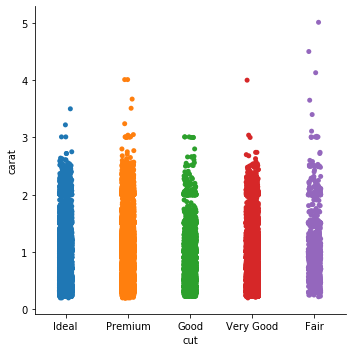

In [4]:
sns.catplot(x='cut',y='carat',data=diamond_data)

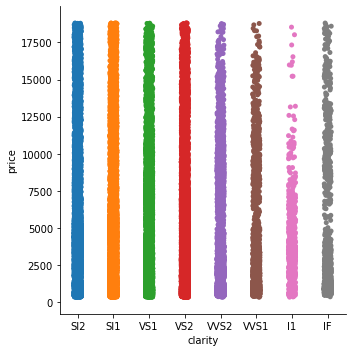

In [5]:
sns.catplot(x='clarity',y='price',data=diamond_data)

The problem with catplots is it works efficiently with numerical data but columns with categorical data has influence on the target. To solve the issue we have to convert the categorical data to numerical data.

### 4. Drop the ‘Unnamed:0’ column, check the dataset for null values, provide the dataset info, and shape of target and feature variables. Make sure there are not any null values. If so, eliminate them. 

In [6]:
diamond_data = diamond_data.drop(["Unnamed: 0"],axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Checking for NULL values

In [7]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
diamond_data.shape

(53940, 10)

In [9]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
diamond_data.dropna(inplace=True)

In [11]:
diamond_data.shape

(53940, 10)

### Once null values are removed, uses the ‘missingno’ library to visualize missing data. What are the conclusions? 

In [12]:
!pip install missingno

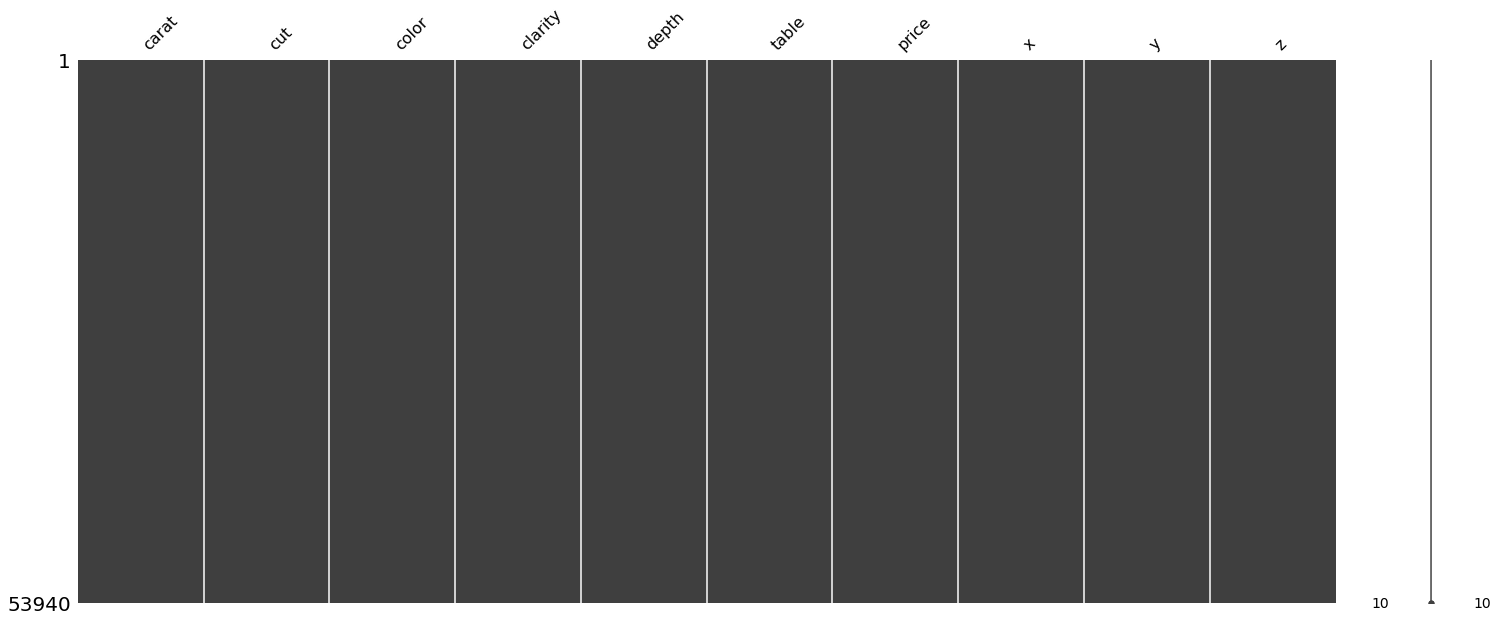

In [13]:
msno.matrix(diamond_data)

It can be concluded that there are no missing values in the dataframe.

### Describing the data. Making sure there are no rows for the x, y, and z variables with a zero value. If there are, removing them. 

In [14]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
print("Number of rows with x == 0: {} ".format((diamond_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_data.z==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 


In [16]:
diamond_data[['x','y','z']] = diamond_data[['x','y','z']].replace(0,np.NaN)

In [17]:
diamond_data.dropna(inplace=True)

### Providing a correlation heatmap. What are the conclusions?

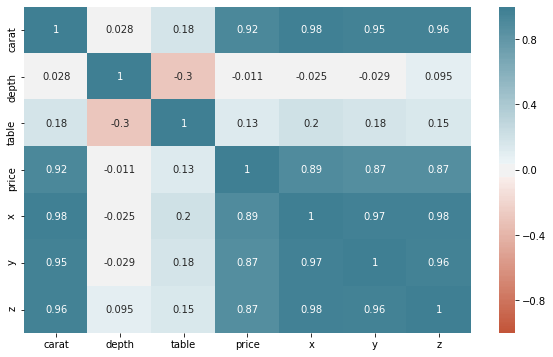

In [18]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(diamond_data.corr(), annot=True,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

#### Conclusions from the heatmap:
Considering price to be our target,<br>
- Variables 'x','y','z' and 'carat' have a high effect on the price<br>
- 'Depth' has no effect on the price<br>
- 'Table' seems to have a slight effect on price<br>

~Correlation is usually defined as a measure of the linear relationship between two quantitative variables.<br>
~Correlation quantifies the strength of the linear relationship between a pair of variables, depending on which we can conclude relationship between variables.The stronger the color, the larger is the correlation magnitude.<br>
~Positive correlation is represented from 0 to 1, while negative is represented in the range -1 to 0.

### Using LabelEncoder to create three labels: ‘cut’, ‘color’, and ‘clarity.’ 

We use LabelEncoder to convert categorical data into numerical data understood by the model.

In [19]:
copy_diamond_data=diamond_data.copy()

In [20]:
copy_diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
le = preprocessing.LabelEncoder()
categorical_features=['cut','color','clarity']

for i in range(3):
    copy_diamond_data[categorical_features[i]]=le.fit_transform(copy_diamond_data[categorical_features[i]])
copy_diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Using One Hot encoder will be more helpful in this case. The problem with LabelEncoder is, as there are different numerical values the model is trying to weigh them in an order.

In [22]:
diamond_data=pd.get_dummies(diamond_data)

In [23]:
diamond_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


### Scaling the train and test sets using ‘StandardScaler.’ 

In [24]:
standarScaler=StandardScaler()

In [25]:
standardDiamond_df=pd.DataFrame(standarScaler.fit_transform(diamond_data[['carat','depth','table','x','y','z']]), columns=['carat','depth','table','x','y','z'],index=diamond_data.index)

In [26]:
standardDiamond_df.head()

,carat,depth,table,x,y,z
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583


In [27]:
standardDiamond_df.shape

(53920, 6)

In [28]:
diamond_data.shape

(53920, 27)

In [29]:
standardDiamond_df.tail()

,carat,depth,table,x,y,z
53935,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004
53936,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575
53937,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403
53938,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622
53939,-0.100674,0.314515,-1.099725,0.087879,0.118508,0.142278


In [30]:
diamond_df_standard = diamond_data.copy(deep=True)

In [31]:
diamond_df_standard[['carat','depth','table','x','y','z']] = standardDiamond_df[['carat','depth','table','x','y','z']]

In [32]:
diamond_df_standard.isnull().sum()

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

### Defining y as ‘price’ and creating a train and test set. The test set represents 20% of the data.

In [33]:
X = diamond_df_standard.drop('price',1)
y = diamond_df_standard['price']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
R2_Scores=[]
models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 'Random Forest Regression']

### Run a linear regression model. Providing the accuracy scores. Determining the MSE, MAE, RMSE, and r2_score for the y_test and y_pred model.

In [36]:
regr = LinearRegression()
regr.fit(X_test,y_test)
y_pred = regr.predict(X_test)
linear_accuracy=regr.score(X_test,y_test)*100
linear_mse=mean_squared_error(y_test,y_pred)
linear_mae=mean_absolute_error(y_test,y_pred)
linear_rmse=linear_mse**0.5
linear_R2 = r2_score(y_test,y_pred)
R2_Scores.append(linear_R2)
print("LINEAR MODEL")
print("accuracy: {:.2f}".format(linear_accuracy) + "%")
print("Mean squared error: {:.2f}". format(linear_mse))
print("Mean absolute error: {:.2f}". format(linear_mae))
print("Root mean squared error : {:.2f}".format(linear_rmse))
print("R2_Score: {:.2f}".format(linear_R2))

LINEAR MODEL
accuracy: 91.81%
Mean squared error: 1326415.14
Mean absolute error: 749.63
Root mean squared error : 1151.70
R2_Score: 0.92


##### Linear Model with crossvalidation

In [37]:
MAE=cross_val_score(regr, X,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(regr, X,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(regr, X,y,cv=5, scoring='r2')
print("LINEAR MODEL with CV")
print("Mean absolute error: {:.2f}".format(MAE.mean()))
print("Mean squared error: {:.2f}".format(MSE.mean()))
print("Root Mean squared error: {:.2f}".format((abs(MSE.mean()))**0.5))
print('R Squared: {:.2f}'.format(R2.mean()))

LINEAR MODEL with CV
Mean absolute error: -960.77
Mean squared error: -2231755.61
Root Mean squared error: 1493.91
R Squared: -2.74


### What is the purpose of cross validation?

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data. The motivation to use cross validation techniques is that when we fit a model, we are fitting it to a training dataset.
    [https://www.researchgate.net/post/What_is_the_purpose_of_performing_cross-validation]

### Repeating the same for the Lasso model. 

In [38]:
las_reg = Lasso()
las_reg.fit(X_test,y_test)
y_pred = las_reg.predict(X_test)
lasso_accuracy=regr.score(X_test,y_test)*100
lasso_mse=mean_squared_error(y_test,y_pred)
lasso_mae=mean_absolute_error(y_test,y_pred)
lasso_rmse=lasso_mse**0.5
lasso_R2 = r2_score(y_test,y_pred)
R2_Scores.append(lasso_R2)
print("LASSO MODEL")
print("accuracy: {:.2f}".format(lasso_accuracy) + "%")
print("Mean squared error: {:.2f}".format(lasso_mse))
print("Mean absolute error: {:.2f}". format(lasso_mae))
print("Root mean squared error : {:.2f}".format(lasso_rmse))
print("R2_Score: {:.2f}".format(lasso_R2))

LASSO MODEL
accuracy: 91.81%
Mean squared error: 1326824.55
Mean absolute error: 747.86
Root mean squared error : 1151.88
R2_Score: 0.92


D:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23298934.603868484, tolerance: 17463842.97598932
  positive)


#### Lasso model with Crossvalidation 

In [39]:
MAE=cross_val_score(las_reg, X,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(las_reg, X,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(las_reg, X,y,cv=5, scoring='r2')
print("LASSO MODEL with CV")
print("Mean absolute error: {:.2f}".format(MAE.mean()))
print("Mean squared error: {:.2f}".format(MSE.mean()))
print("Root Mean squared error: {:.2f}".format(abs(MSE.mean())**0.5))
print('R Squared: {:.2f}'.format(R2.mean()))

D:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547563790.4724579, tolerance: 79695942.25906798
  positive)
D:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547563790.4724579, tolerance: 79695942.25906798
  positive)


LASSO MODEL with CV
Mean absolute error: -965.90
Mean squared error: -2273101.41
Root Mean squared error: 1507.68
R Squared: -2.58


D:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547563790.4724579, tolerance: 79695942.25906798
  positive)


### Repeating the same  for the Ridge Regression model. 

In [40]:
ridge_reg = Ridge()
ridge_reg.fit(X_test,y_test)
y_pred = ridge_reg.predict(X_test)
ridge_accuracy=regr.score(X_test,y_test)*100
ridge_mse=mean_squared_error(y_test,y_pred)
ridge_mae=mean_absolute_error(y_test,y_pred)
ridge_rmse=ridge_mse**0.5
ridge_R2 = r2_score(y_test,y_pred)
R2_Scores.append(ridge_R2)
print("RIDGE MODEL")
print("accuracy: {:.2f}".format(ridge_accuracy) + "%")
print("Mean squared error: {:.2f}". format(ridge_mse))
print("Mean absolute error: {:.2f}". format(ridge_mae))
print("Root mean squared error : {:.2f}".format(ridge_rmse))
print("R2_Score: {:.2f}".format(ridge_R2))

RIDGE MODEL
accuracy: 91.81%
Mean squared error: 1326436.45
Mean absolute error: 749.60
Root mean squared error : 1151.71
R2_Score: 0.92


#### Ridge model with Crossvalidation

In [41]:
MAE=cross_val_score(ridge_reg, X,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(ridge_reg, X,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(ridge_reg, X,y,cv=5, scoring='r2')
print("RIDGE MODEL with CV")
print("Mean absolute error: {:.2f}".format(MAE.mean()))
print("Mean squared error: {:.2f}".format(MSE.mean()))
print("Root Mean squared error: {:.2f}".format(abs(MSE.mean())**0.5))
print("R Squared: {:.2f}".format(R2.mean()))

RIDGE MODEL with CV
Mean absolute error: -961.05
Mean squared error: -2233525.53
Root Mean squared error: 1494.50
R Squared: -2.73


### Repeating the same for the Random Forest Regression model. 

In [42]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_test,y_test)
y_pred = rfr.predict(X_test)
rfr_accuracy=regr.score(X_test,y_test)*100
rfr_mse=mean_squared_error(y_test,y_pred)
rfr_mae=mean_absolute_error(y_test,y_pred)
rfr_rmse=rfr_mse**0.5
rfr_R2 = r2_score(y_test,y_pred)
R2_Scores.append(rfr_R2)
print("RANDOM FOREST MODEL")
print("accuracy: {:.2f}".format(rfr_accuracy) + "%")
print("Mean squared error: {:.2f}".format(rfr_mse))
print("Mean absolute error: {:.2f}".format(rfr_mae))
print("Root mean squared error: {:.2f}".format(rfr_rmse))
print("R2_Score: {:.2f}".format(rfr_R2))

RANDOM FOREST MODEL
accuracy: 91.81%
Mean squared error: 49788.58
Mean absolute error: 114.72
Root mean squared error: 223.13
R2_Score: 1.00


#### Random forest regression model with crossvalidation

In [43]:
MAE=cross_val_score(rfr, X,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(rfr, X,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(rfr, X,y,cv=5, scoring='r2')
print("RANDOM FOREST REGRESSION MODEL with CV")
print("Mean absolute error: {:.2f}".format(MAE.mean()))
print("Mean squared error: {:.2f}".format(MSE.mean()))
print("Root Mean squared error: {:.2f}".format(abs(MSE.mean())**0.5))
print("R Squared: {:.2f}".format(R2.mean()))

RANDOM FOREST REGRESSION MODEL with CV
Mean absolute error: -978.53
Mean squared error: -3445452.13
Root Mean squared error: 1856.19
R Squared: 0.31


### Using GridSearchCV to determine the Score and R2_score. Is the outcome different from the model outcomes in question 16? 

In [44]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
grid=GridSearchCV(estimator=RandomForestRegressor(), param_grid= params_dict, scoring='r2')

In [45]:
gridResult=grid.fit(X_test,y_test)

D:\Python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [46]:
grid_y_predict=grid.predict(X_test)
print("GridForest Score {:.2f}".format(grid.score(X_test,y_test)))
print("Grid Forest R squared {:.2f}".format(r2_score(y_test, grid_y_predict )))

GridForest Score 1.00
Grid Forest R squared 1.00


The r2_score for Grid is same as that of Random Forest Regressor Model which is 1.00

### Creating a DataFrame that compares the R2_Scores from the different models.

In [47]:
R2_df=pd.DataFrame(R2_Scores,models)

In [48]:
R2_df.columns=['R2 scores']

In [49]:
R2_df

,R2 scores
Linear Regression,0.918093
Lasso Regression,0.918068
Ridge Regression,0.918092
Random Forest Regression,0.996926


### Creating a bar plot to show the R2_Scores by model. 

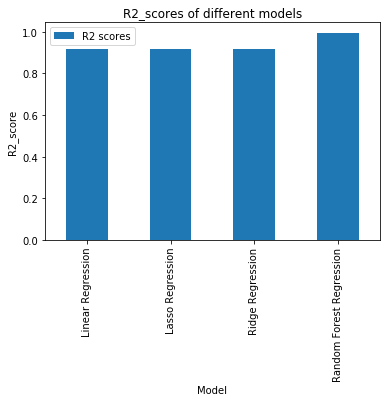

In [50]:
R2_df.plot(kind="bar")
plt.xlabel("Model")
plt.ylabel("R2_score")
plt.title("R2_scores of different models")
plt.show()

### How do you think the linear regression model performed? 

The Linear model performed well with 91.8% accuracy and has a R2_score of 0.92. 

### Did penalized models perform better than others? Explain the logic behind Ridge and Lasso regression. When do you best use Lasso versus Ridge regression? 

The penalized models(Ridge and Lasso) performed similar to Linear model with same accuracy and R2_scores.<br>
<br>
In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients. Lasso takes the square of the coefficients, and magnitudes are taken into account. <br>
Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity while Lasso regression helps in reducing over-fitting and helps us in feature selection.<br>
<br>
Lasso -> Feature selection and Reducing over-fitting<br>
Ridge -> Reducing over-fitting